## Introduction 
This contains the code written in training two algorithms (Random Forest and Neural Networks (Multi Layer Perceptron) on predicting whether a transaction is fraudent or not. The CRISP-DM data mining model was applied in this code, hence the code is sectioned into the following:
1. Business understanding
2. Data understanding
3. Data preparation
4. Modeling 
5. Evaluation

### 1.0 Business Understanding
In order to reduce the number of fraudulent transactions, the goal is to understand the patterns of fraudulent transactions, train a model that will be able to accurately predict these fraudulent transactions before they occur. 

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt # For handling dates and time
%matplotlib inline

In [2]:
# Importing libraries for balancing the dataset
from imblearn.under_sampling import RandomUnderSampler as under
from sklearn.model_selection import train_test_split

In [3]:
# Reading in the files
data = pd.read_csv('fraudTrain.csv')

### 2.0 Data Understanding
This step involves data exploration and understanding how certain features of the dataset works. The steps taken in data exploration include the following:
- Identification of variables and data types
- Univariate Analysis
- Bivariate Analysis
- Identifying missing values
- Identifying outliers
- Correlation Analysis

#### 2.1 Identification of variables and data types

In [4]:
# Previewing the data
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
# Getting the information about the train dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
# Showing only the integer and float columns
num_cols = data.select_dtypes(exclude='object')

num_cols.head()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0


In [7]:
# Showing the object columns
cat_cols = data.select_dtypes(include='object')

cat_cols.head()

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46


In [8]:
(cat_cols['first'] + " " + cat_cols['last']).value_counts()

Scott Martin         4618
Jeffrey Smith        3592
Barbara Taylor       3123
Monica Cohen         3123
Jessica Perez        3119
                     ... 
Mark Pennington         7
Angelica Lopez          7
Kelly Lawrence          7
Cody Blake              7
Danielle Schaefer       7
Length: 973, dtype: int64

#### 2.2 Univariate Analysis

**Numerical Columns**<br>
Although the cc_num, zip, lat, long, unix_time, merch_lat and merch_long columns are integer-based columns they are however categories as they are used to describe an individual and do not provide further meanings when mean, median or measures of dispersion is calculated on them. Thus the columns that will be interpreted are Unnamed: 0, amt, city_pop and is_fraud columns.

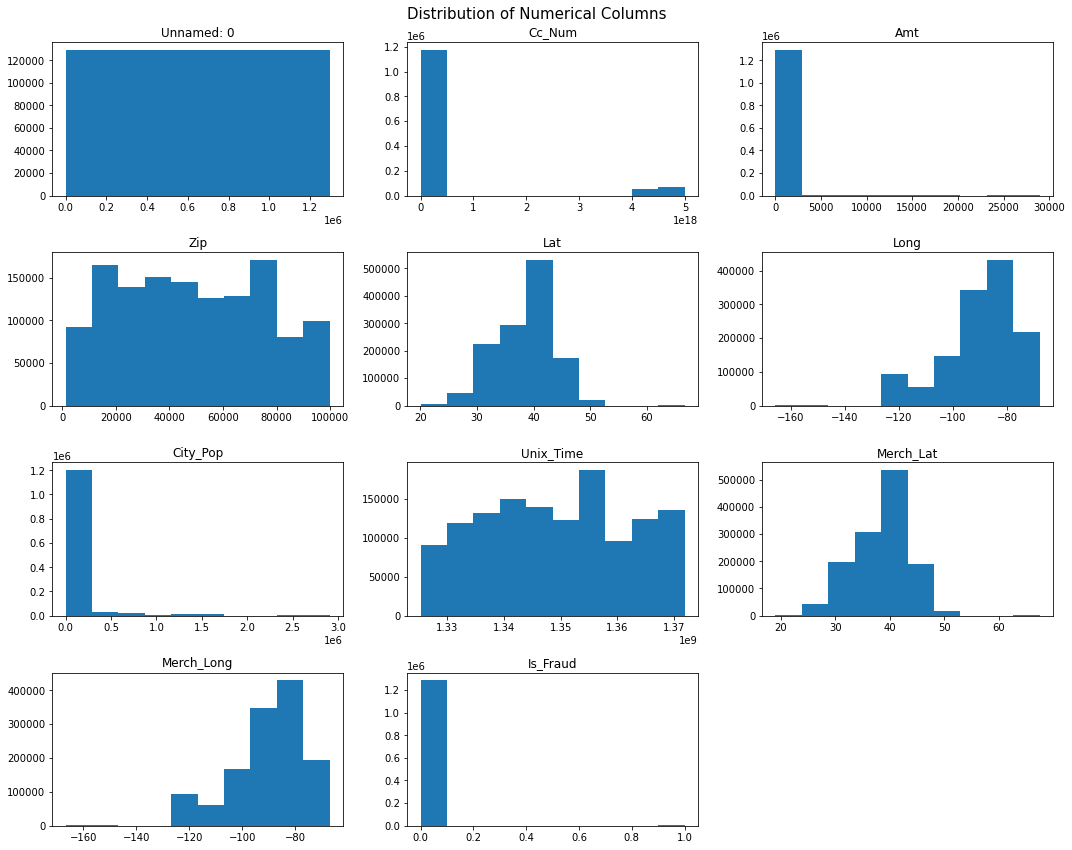

In [9]:
plt.figure(figsize=(15, 12)) # Creating a figure object of 15 by 9 inches
for ind, col in enumerate(num_cols.keys()):
    plt.subplot(4, 3, ind + 1) # Creating suplots using the functional method
    plt.hist(num_cols[col]) # Plotting the histogram
    plt.title(col.title()) # Titling each graph
plt.suptitle("Distribution of Numerical Columns", size=15)
plt.tight_layout(); 

In [10]:
# Descriptive analysis of the Unnamed columns
num_cols[['Unnamed: 0', "amt", "city_pop"]].describe()

,Unnamed: 0,amt,city_pop
count,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,7.035104e+01,8.882444e+04
std,3.743180e+05,1.603160e+02,3.019564e+05
min,0.000000e+00,1.000000e+00,2.300000e+01
25%,3.241685e+05,9.650000e+00,7.430000e+02
50%,6.483370e+05,4.752000e+01,2.456000e+03
75%,9.725055e+05,8.314000e+01,2.032800e+04
max,1.296674e+06,2.894890e+04,2.906700e+06


In [11]:
# Obtaining the mode for the columns
num_cols[[ "amt", "city_pop", "is_fraud"]].mode()

,amt,city_pop,is_fraud
0,1.14,606,0


**Categorical/Object Columns**

In [12]:
# Number of unique values in the dataset
cat_cols.apply(lambda x: x.nunique())

trans_date_trans_time    1274791
merchant                     693
category                      14
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
job                          494
dob                          968
trans_num                1296675
dtype: int64

In [13]:
# Mode for categorical columns
cat_cols.drop(columns='trans_num').mode()

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob
0,2019-04-22 16:02:01,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,TX,Film/video editor,1977-03-23
1,2020-06-01 01:37:47,NaN,NaN,NaN,NaN,NaN,864 Reynolds Plains,NaN,NaN,NaN,NaN
2,2020-06-02 12:47:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Outputting the occurences of the mode
cat_cols.apply(lambda x: x.value_counts().head(1))

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
0069 Robin Brooks Apt. 695,NaN,NaN,NaN,NaN,NaN,NaN,3123.0,NaN,NaN,NaN,NaN,NaN
0b242abb623afc578575680df30655b9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1977-03-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5636.0,NaN
2019-04-22 16:02:01,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Birmingham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5617.0,NaN,NaN,NaN,NaN
Christopher,NaN,NaN,NaN,26669.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN,709863.0,NaN,NaN,NaN,NaN,NaN,NaN
Film/video editor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9779.0,NaN,NaN
Smith,NaN,NaN,NaN,NaN,28794.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94876.0,NaN,NaN,NaN


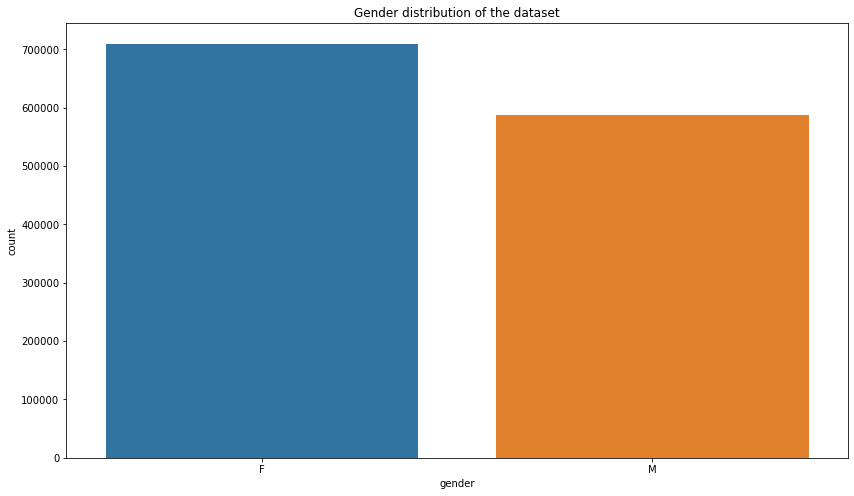

In [59]:
# Plotting the gender distribution of the dataset
plt.figure(figsize=(14, 8))
sns.countplot(x='gender', data=data)
plt.title("Gender distribution of the dataset");

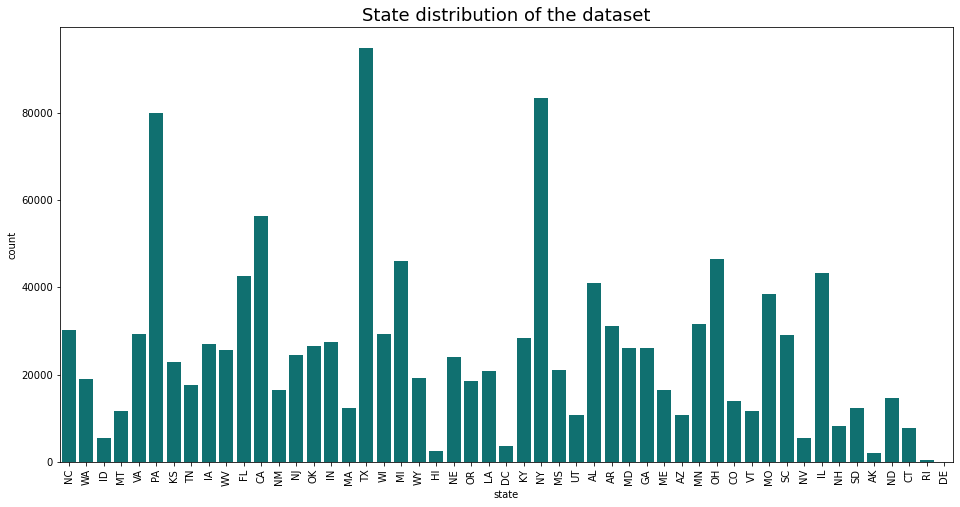

In [60]:
# Plotting the state distribution of the dataset
plt.figure(figsize=(16, 8))
sns.countplot(x='state', data=data, color='teal')
plt.title("State distribution of the dataset", size=18)
plt.xticks(rotation=90);

#### Observation
From initial exploration it shows the dataset has 23 columns with 1,296,675 rows. Five of those columns (amt, lat, long, merch_lat, merch_long) are float-based columns, six (Unnamed: 0, cc_num, zip, city_pop, unix_time, and is_fraud) are integer-based columns while 12 are object/categorical columns (trans_date_trans_time ,merchant ,category ,first ,last ,gender ,street ,city ,state ,job ,dob and trans_num).

**Numerical Columns**<br>
As shown in the table above, the mean value of the Unnamed: 0 column was 648337 with 0 as the minimum value while the maximum value was 1296674 and 6483370 as the median value. Given that the frequency of all the values were the same for the column, the column was multi-modal. The amt ranged from 1.0 to 28948.9 with a $mean \pm $standard deviation of $70.351 \pm $16.031. The median value was 47.52 with a unimodal value of 1.14. The city_pop values ranged from the 23 to 290670 with a $mean \pm $standard deviation of $88824.44 \pm $301956.4 with a unimodal value of 606. 
The is_fraud column contained only two values (0 or 1) indicating whether a transaction is fraudulent or not. The most occuring value was 0 (indicating that the dataset is not balanced). 


**Categorical Columns**<br>
The number of categories within the columns show that trans_date_trans_time and trans_num had over 1 million
categories. There were 693 merchants, 14 categories, 352 first names, 481 last names, 2 genders, 983 streets, 894 cities, 51 states, 494 jobs and 968 dob (date of birth). 

As shown in the table above, the trans_date_trans_time was tri-modal with the 2019-04-22 16:02:01, 2020-06-01 01:37:47 and 2020-06-02 12:47:07 occuring 4 times each. The most occuring merchant was fraud_Kilback LLC with 4403 occurences while Christopher was the most occuring first name with 26669 occurences. The most occuring last name was Smith with 28794 occurences while the female gender had 709863 occurences. The street column was Bi-modal with 0069 Robin Brooks Apt. 695 and 864 Reynolds Plains having 3123 occurences respectively. Birmingham and TX were the most occuring city and state respectively with 5617 and 94876  occurences respectively. The most occuring job was the Film/video editor with 9779 occurences while the most occuring date of birth was 1977-03-23  with 5636 occurences. The trans_num was was multi-modal as each occurence appeared only once thus indicating that it was a way to uniquely identify each record. 

#### 2.3 Bivariate Analysis
Given that the column of interest is the is_fraud column, the interaction between is_fraud and other columns in the dataset will be evaluated. 

In [17]:
def plot_biv(column, horz=True):
    plt.figure(figsize=(10, 10))
    plt.title(f"Bivariate Analysis of {column} and is_fraud", size= 13)
    if horz is True:
        sns.countplot(x=column, hue="is_fraud", data=data);
    else:
        sns.countplot(y=column, hue="is_fraud", data=data);

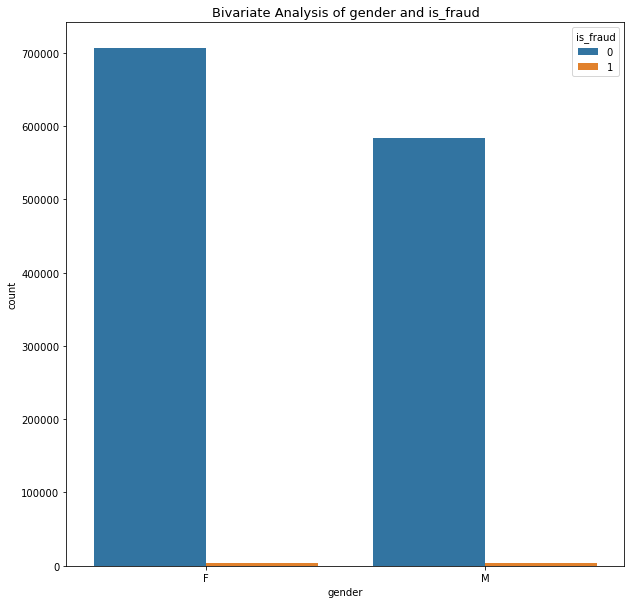

In [18]:
# Plotting gender column data
plot_biv("gender")

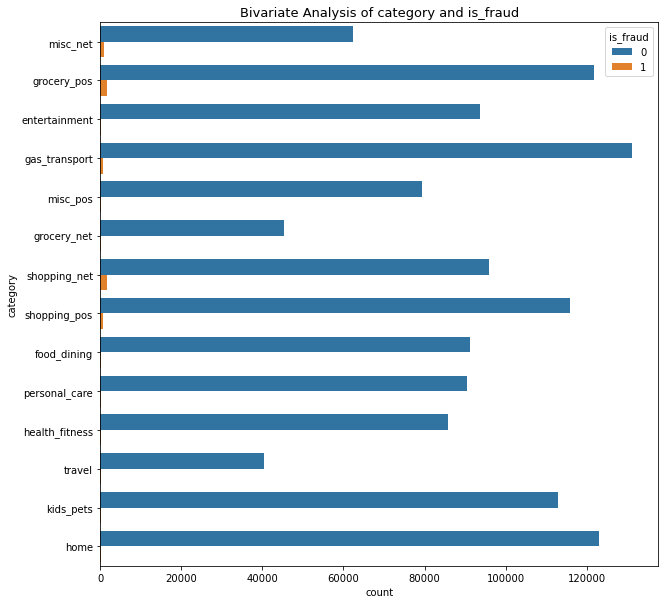

In [19]:
# Plotting the category column and is_fraudb
plot_biv("category", horz=False)

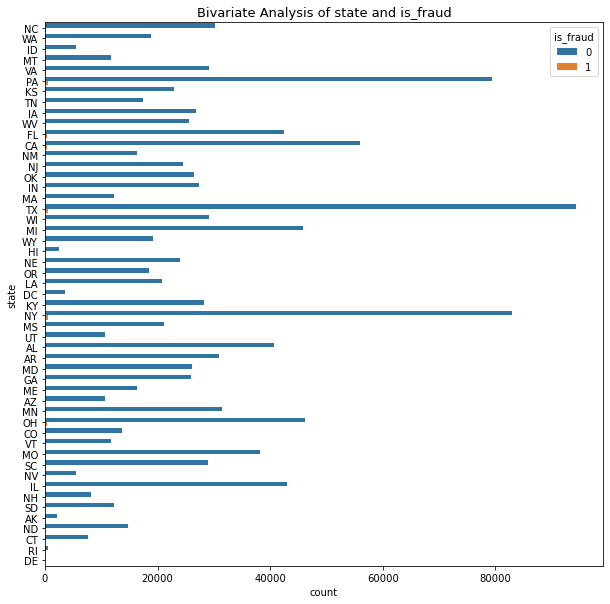

In [20]:
# Plotting the state and is_fraud column
plot_biv('state', horz=False)

In [21]:
# relationship between the is fraud and amt and city_pop
data.pivot_table(values=['amt', 'city_pop'], index='is_fraud')

,amt,city_pop
is_fraud,,
0,67.667110,88775.228137
1,531.320092,97276.763256


Although more males were present in the dataset, it showed that more males had a "fraudulent transaction" as compared to females. The grocery_pos and shopping_net categories had the highest occurence of fraudulent transactions than any other category. 
The graph also showed that NY, PA and TX had the highest occurence of fraudulent transactions than all other cities. From the data, it was observed that the fraudulent transactions had a higher average amount of (531.32) as compared to the non-fraudulent transactions (67.67).

#### 2.4 Identifying Missing Values

In [22]:
# Checking the dataset for missing values
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

From the above, it can be seen that there are no missing values in the dataset
#### 2.5 Outlier Detection

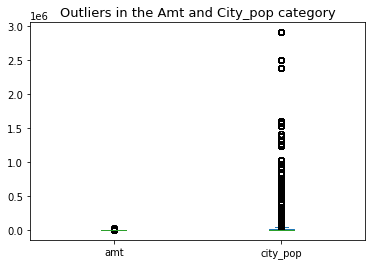

In [23]:
# Identifying outliers in the numerical columns
num_cols[[ "amt", "city_pop"]].plot.box()
plt.title("Outliers in the Amt and City_pop category", size=13);

From the above, it can be seen that outliers exist in the amount and city_pop category with more outliers in the city_pop category than the amt category. 

#### 2.6 Correlation Analysis

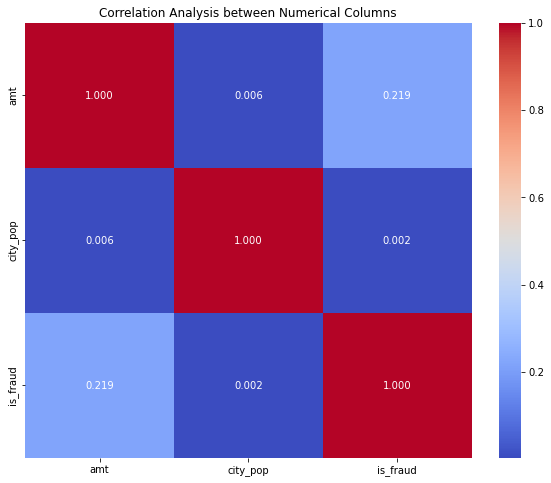

In [24]:
# Correlation analysis of categorical columns
plt.figure(figsize=(10, 8))
sns.heatmap(num_cols[[ "amt", "city_pop", "is_fraud"]].corr(), cmap='coolwarm', annot=True, fmt=".3f")
plt.title("Correlation Analysis between Numerical Columns");

### 3.0 Data Preparation
Given the nature of the dataset, the following data preparation methods will be employed:
- Dropping columns
- Transforming variables
- Resampling (Undersampling)
- Encoding and Decomposition
    - Label 
    - One-hot encoding
- Outlier treatment
- Feature Selection
- Splitting the dataset

#### 3.1 Dropping Columns
The columns that will be dropped are 
- Unnamed: 0: This shows the index of each record
- first, last: The first and last names of the individuals will be dropped as 
- zip: This is dropped as the information provided by street, city and state give virtually the same data
- lat, long: This is dropped as the data provided by street, city and state is sufficient for the purpose of this research. 
- unix_time: This is dropped as this can be retrieved from the trans_date_trans_time. 
- trans_num: This is unique across records and thus does not provide any extra details.
- merch_long, merch_lat: The longitude and latitude of the merchant is dropped as handling geospatial data is beyond the scope of this research. 

In [25]:
cols_to_drop = ['Unnamed: 0', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'first', 'last','zip', 'lat', 'long']

# dropping the columns
data.drop(columns=cols_to_drop, inplace=True)

#### 3.2 Transforming Variables
The columns that will be transformed include: 
1. cc-num: As shown in the article by [Pritchard](https://www.thebalancemoney.com/what-do-the-numbers-on-your-credit-card-mean-4588401) (2022), the Credit Card Num (CC Num) is divided into three parts. They include: 
    1. Information about the card issuer: The information is broken into two parts:
        - Industry Number: The first digit of your card is an industry identifier. The numbers include:
                1	Airline
                2	Some Mastercard accounts since 2017
                3	American Express and Diners Club
                4	Visa
                5	Mastercard
                6	Discover 
                7	Petroleum
                8	Telecommunications
                9	Government
        - Issuer Identification Number: The next six to eight digits are an issuer identification number (IIN)
    2. Your account information: The remaining digits, except for the last digit, are unique to your specific credit card account.
    3. A check digit: The last digit of a 16-digit PAN is the check digit—an essential part of a checksum, which helps to ensure that a credit card number is valid
2. trans_date_trans_time: The weekday and hour will be obtained from the column

In [26]:
# Obtaining the issuer number
data['card-issuer'] = data['cc_num'].apply(lambda x: str(x)[0])


card_issuer_codes = {'1': "Airline",
                    '2': "Mastercard",
                    '3': "American Express",
                    '4': 'Visa',
                    '5': 'Mastercard',
                    '6': 'Discover', "7": "Petroleum", "8": "Telecommunications"}


# Mapping the card numbers to the issuers
data['card-issuer'] = data['card-issuer'].replace(card_issuer_codes)


In [27]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,city_pop,job,dob,is_fraud,card-issuer
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,3495,"Psychologist, counselling",1988-03-09,0,Mastercard
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,149,Special educational needs teacher,1978-06-21,0,Discover
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,4154,Nature conservation officer,1962-01-19,0,American Express
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,1939,Patent attorney,1967-01-12,0,American Express
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,99,Dance movement psychotherapist,1986-03-28,0,American Express


In [28]:
# Converting to date time object
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# Extracting the day name from the data
data['weekday'] = data['trans_date_trans_time'].dt.strftime('%A')

# Getting the hour from the data
data['hour'] = data['trans_date_trans_time'].dt.hour

In [29]:
# Converting the date of birth to age
data['age'] = np.round((dt.now() - pd.to_datetime(data['dob'])).dt.days / 365.2425, 0).astype(int)

Given that categories are usually converted to numerical data, the categories in this dateaset will be converted. However, the number of categories within each column is a lot, thus to handle that, the top 30 categories in each column will be considered while all the other values will be grouped as "others".

In [30]:
# the columns have been transformed
drops = ['cc_num', "trans_date_trans_time", 'dob']

# dropping the transformed columns
data.drop(columns=drops, inplace=True)

#### 3.3 Undersampling Data

In [31]:
# Splitting the dataset into features and target variable
X, y = data.drop(columns='is_fraud'), data['is_fraud']

In [32]:
# Undersampling the data using the majority sample strategy
sampler = under(sampling_strategy='majority')
X, y = sampler.fit_resample(X, y)

In [33]:
# Checking the undersampled data
y.value_counts()

0    7506
1    7506
Name: is_fraud, dtype: int64

#### 3.4 Encoding & Decompostion
The encoding that will be applied include:
- Label encoding: The gender column will be label encoded
- One-hot encoding: The columns that will be one hot encoded include: merchant, category, street, state, job, card-issuers and weekday. Some of the columns will be decomposed using Principal Component Analysis (PCA). They include: merchant, category, street, state and job. These columns were decomposed using PCA because they contain a lot of categories and would thus lead to the curse of dimensionality. 

In [34]:
# Label encoding the gender column for the test and train data
X['gender'] = X['gender'].astype('category').cat.codes

In [35]:
# Columns for one-hot encoding alone
ohe_only = ['card-issuer', 'weekday']

# Creating dummies for the above cols
dummy_cols_train = pd.get_dummies(X[ohe_only], drop_first=True)

In [36]:
# Concatenating the dummies with the existing dataset
X = pd.concat([X.drop(columns=ohe_only), dummy_cols_train], axis=1)

In [37]:
# importing PCA for decomposition
from sklearn.decomposition import PCA

In [38]:
# creating a pca for one component
pca = PCA(n_components=1)

In [39]:
# Cols for one hot encoding and pca
cols_for_pca = ['merchant', 'category','street', 'city', 'state','job']

# Decomposing the one-hot encoded variables
for col in cols_for_pca:
    X[col] = pca.fit_transform(pd.get_dummies(X[col], drop_first=True))

In [40]:
# Previewing the dataset
X.head()

,merchant,category,amt,gender,street,city,state,city_pop,job,hour,...,card-issuer_American Express,card-issuer_Discover,card-issuer_Mastercard,card-issuer_Visa,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,-0.002556,-0.051187,51.56,0,-0.008960,-0.003540,-0.010371,1847,-0.003910,20,...,0,1,0,0,1,0,0,0,0,0
1,-0.003007,-0.058699,10.44,1,-0.000724,-0.003055,-0.011289,4159,-0.004771,13,...,0,0,0,1,1,0,0,0,0,0
2,-0.002824,-0.080291,55.14,1,-0.233266,-0.005021,-0.006631,276896,-0.008353,10,...,0,0,0,1,0,0,0,0,0,0
3,-0.002566,-0.057329,73.46,1,0.010705,-0.003651,0.786904,277,-0.004816,20,...,1,0,0,0,0,1,0,0,0,0
4,-0.009536,-0.592746,8.87,0,-0.023170,-0.003168,-0.011639,6951,-0.005327,14,...,1,0,0,0,0,0,0,0,0,0


#### 3.5 Outlier Removal
Only the natively numerical columns will be observed for outliers. Thus only the age and amount columns will be checked for outliers. The IQR method of outlier removal will be employed in removing the outliers. 

In [41]:
def outlier_removal(col, dataset):
    # Obtaining the first and third quantile
    q1 = dataset[col].quantile(0.25)
    q3 = dataset[col].quantile(0.75)
    
    # The interquartile range
    iqr = q3 - q1 
    
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    # getting the index values of the outliers
    outlier_ind = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)].index
    
    # returning the outlier
    return list(outlier_ind)

In [42]:
# getting the outliers of both columns for train dataset
outliers_train = outlier_removal('city_pop', X) + outlier_removal('amt', X)


# Removing the outliers for the target and features dataset
X.drop(outliers_train, inplace=True)
y.drop(outliers_train, inplace=True)

In [43]:
# Dataset after outlier removal and cleaning
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12041 entries, 0 to 15010
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   merchant                      12041 non-null  float64
 1   category                      12041 non-null  float64
 2   amt                           12041 non-null  float64
 3   gender                        12041 non-null  int8   
 4   street                        12041 non-null  float64
 5   city                          12041 non-null  float64
 6   state                         12041 non-null  float64
 7   city_pop                      12041 non-null  int64  
 8   job                           12041 non-null  float64
 9   hour                          12041 non-null  int64  
 10  age                           12041 non-null  int32  
 11  card-issuer_American Express  12041 non-null  uint8  
 12  card-issuer_Discover          12041 non-null  uint8  
 13  c

In [44]:
X.head()

,merchant,category,amt,gender,street,city,state,city_pop,job,hour,...,card-issuer_American Express,card-issuer_Discover,card-issuer_Mastercard,card-issuer_Visa,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,-0.002556,-0.051187,51.56,0,-0.008960,-0.003540,-0.010371,1847,-0.003910,20,...,0,1,0,0,1,0,0,0,0,0
1,-0.003007,-0.058699,10.44,1,-0.000724,-0.003055,-0.011289,4159,-0.004771,13,...,0,0,0,1,1,0,0,0,0,0
3,-0.002566,-0.057329,73.46,1,0.010705,-0.003651,0.786904,277,-0.004816,20,...,1,0,0,0,0,1,0,0,0,0
4,-0.009536,-0.592746,8.87,0,-0.023170,-0.003168,-0.011639,6951,-0.005327,14,...,1,0,0,0,0,0,0,0,0,0
6,0.070202,0.789602,101.99,1,-0.000312,-0.002935,-0.008756,365,-0.006521,7,...,0,0,1,0,0,0,0,0,0,1


#### 3.6 Feature Selection
Correlation analysis will be used to select the features that will be used for the model building. Values with very low correlation will be discarded for values with higher correlation values

In [45]:
# Correlation analysis
corrs = pd.concat([X, y], axis=1).corr()

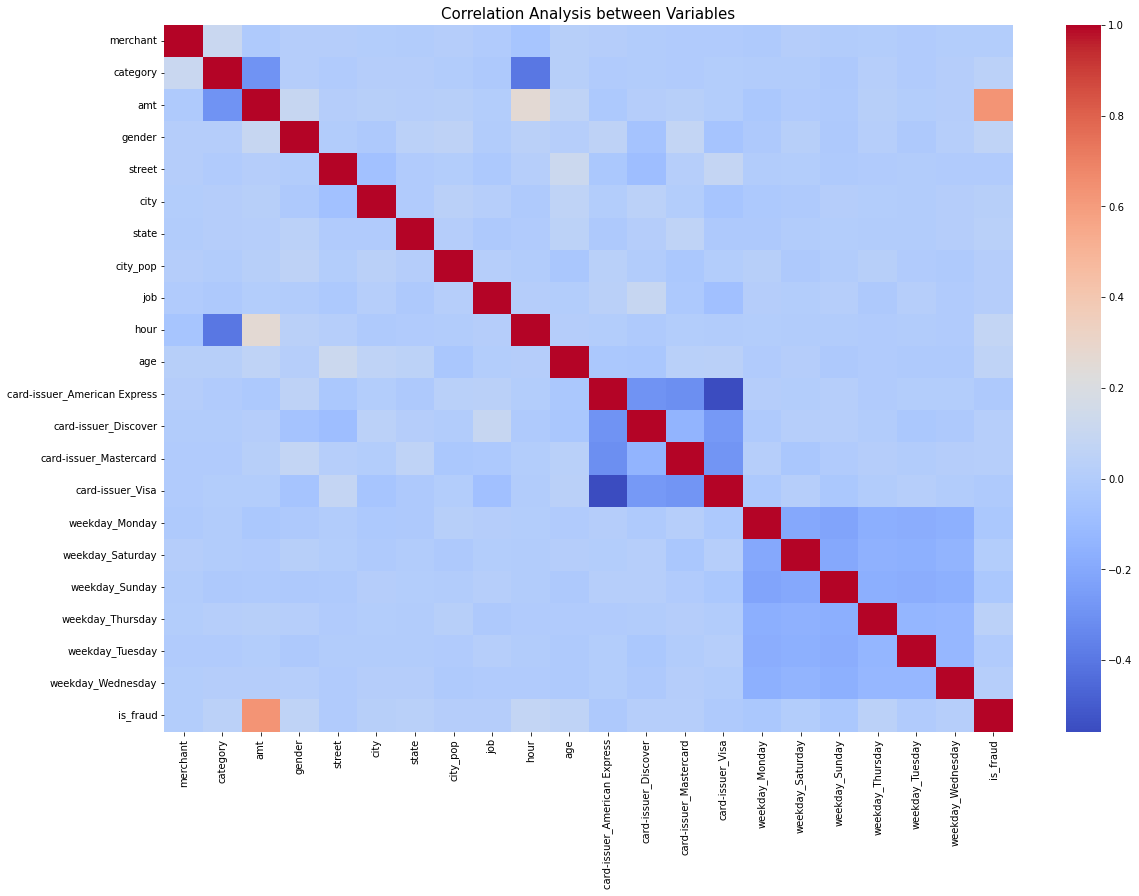

In [46]:
# Plotting the correlation analysis of Variables
plt.figure(figsize=(19, 13))
sns.heatmap(corrs, cmap='coolwarm')
plt.title("Correlation Analysis between Variables", size=15, );

In [47]:
# Correlation analysis of the target variable
corrs['is_fraud'].abs().sort_values()

street                          0.003790
weekday_Saturday                0.004273
weekday_Tuesday                 0.005475
merchant                        0.006914
city_pop                        0.010243
card-issuer_Visa                0.010681
job                             0.011290
card-issuer_American Express    0.017937
weekday_Wednesday               0.018521
card-issuer_Discover            0.019079
card-issuer_Mastercard          0.019452
city                            0.026422
weekday_Sunday                  0.028988
weekday_Monday                  0.031713
state                           0.031977
weekday_Thursday                0.039455
category                        0.039681
age                             0.059239
gender                          0.063118
hour                            0.079879
amt                             0.634868
is_fraud                        1.000000
Name: is_fraud, dtype: float64

All variables with correlation coefficient less 0.01 will be discarded. The columns include 'city_pop', 'job', 'card-issuer_Discover', 'card-issuer_Visa', and 'weekday_Tuesday',

In [48]:
# Columns with low correlation
low_corrs = ['city_pop', 'job', 'card-issuer_Discover', 'card-issuer_Visa','weekday_Tuesday',]

# Removing the low correlation values
X.drop(columns = low_corrs, inplace=True)

#### Splitting the Dataset
The dataset will be split using the train-test split function with train, test ratio of 80%, 20% respectively. 

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 4.0 Modelling

In [51]:
# Importing the random forest and mlp classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [52]:
# Instantiating a class for the random and mlp classifiers
forest = RandomForestClassifier()
mlp = MLPClassifier()

In [53]:
# Fitting the classifiers
forest.fit(X_train, y_train)
mlp.fit(X_train, y_train)

MLPClassifier()

In [54]:
len(forest.predict(X_test))

2409

In [55]:
X_test

,merchant,category,amt,gender,street,city,state,hour,age,card-issuer_American Express,card-issuer_Mastercard,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Wednesday
3947,-0.002565,-0.057329,93.64,1,0.023762,-0.003613,-0.007828,12,42,0,0,1,0,0,0,0
7191,-0.002952,-0.057329,47.42,0,-0.000376,-0.002945,-0.010371,20,70,0,0,0,0,0,0,0
4242,-0.129896,0.789602,88.49,0,0.003075,-0.008333,-0.014234,19,26,1,0,0,0,0,0,1
3954,-0.002142,-0.042890,65.47,0,-0.000428,-0.002801,-0.009908,6,29,0,0,0,0,1,0,0
6908,-0.002499,-0.058699,3.67,0,-0.002192,-0.003141,-0.610512,22,56,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474,-0.002897,-0.077262,410.28,0,-0.000545,-0.002891,-0.007162,11,49,0,0,0,0,0,1,0
8682,-0.002104,-0.042890,18.24,0,-0.002701,-0.003326,0.786904,1,64,1,0,1,0,0,0,0
6752,-0.002732,-0.080291,86.46,0,0.008046,-0.003841,-0.009908,9,56,0,0,1,0,0,0,0
3569,-0.002873,-0.077262,10.43,0,-0.000710,-0.003417,-0.008891,21,32,0,0,0,0,0,0,1


In [56]:
# Predicting the target class
y_predict_forest = forest.predict(X_test)
y_predict_mlp = mlp.predict(X_test)

### 5.0 Evaluation
The metrics for evaluating the model will be: Accuracy, precision and recall. 

In [57]:
# importing the metrics
from sklearn.metrics import confusion_matrix, classification_report

In [58]:
# CLassification report for the models
for i in [("Random Forest", y_predict_forest), ("Neural Network (MLP)", y_predict_mlp)]:
    print("="*60)
    print("Classification Report for {}".format(i[0]))
    print("="*60)
    print(classification_report(y_test, i[1]))
    print('='*50)
    print("Confusion Matrix for {}".format(i[0]))
    print('='*50)
    print(confusion_matrix(y_test, i[1]))
    print('\n')

Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1228
           1       0.97      0.96      0.97      1181

    accuracy                           0.97      2409
   macro avg       0.97      0.97      0.97      2409
weighted avg       0.97      0.97      0.97      2409

Confusion Matrix for Random Forest
[[1199   29]
 [  51 1130]]


Classification Report for Neural Network (MLP)
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1228
           1       0.97      0.86      0.91      1181

    accuracy                           0.92      2409
   macro avg       0.92      0.92      0.92      2409
weighted avg       0.92      0.92      0.92      2409

Confusion Matrix for Neural Network (MLP)
[[1197   31]
 [ 165 1016]]




From the result, it showed that the random forest classifier performed better in all the metrics used in evaluation.

References:

Badr, W. (2019). Having an Imbalanced Dataset? Here Is How You Can Fix It. [online] Medium. Available at: https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb [Accessed 30 Dec. 2022].

Grant, P. (2022). How to Find Outliers with IQR Using Python | Built In. [online] builtin.com. Available at: https://builtin.com/data-science/how-to-find-outliers-with-iqr [Accessed 30 Sep. 2022].

Pritchard, J. (2022). Where Does Your Credit Card Number Come From? [online] The Balance. Available at: https://www.thebalancemoney.com/what-do-the-numbers-on-your-credit-card-mean-4588401 [Accessed 29 Dec. 2022].

Korstanje, J. (2021). SMOTE. [online] Medium. Available at: https://towardsdatascience.com/smote-fdce2f605729#:~:text=SMOTE%20is%20an%20algorithm%20that [Accessed 14 Dec. 2022].

Tripathi, H. (2019). What Is Balance And Imbalance Dataset? [online] Medium. Available at: https://medium.com/analytics-vidhya/what-is-balance-and-imbalance-dataset-89e8d7f46bc5 [Accessed 24 Dec. 2022].

Hotz, N. (2022). CRISP-DM. [online] Data Science Project Management. Available at: https://www.datascience-pm.com/crisp-dm-2/ [Accessed 3 Jan. 2022].



